# Machine Learning Foundation

## Section 1, Part c: EDA Lab

## Pendahuluan 
Pada pembahasan kali ini kita akan menggunakan dataset iris

In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 

## Tugas 1 
 Load dataset kemudian :
 - cek jumlah baris dan kolom

In [9]:
iris = load_iris()
iris.feature_names
iris.data
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
df = pd.DataFrame(iris.data, columns=iris.feature_names,index=pd.Index([i for i in range(iris.data.shape[0])])).join(pd.DataFrame(iris.target, columns=pd.Index(["species"]), index=pd.Index([i for i in range(iris.target.shape[0])])))

In [11]:
df.species.replace({0:'setosa', 1:'versicolor',2:'virginica'}, inplace = True)

In [12]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [16]:
print("Jumlah Baris : {baris}". format(baris = df.shape[0]))
print("Jumlah kolom : {kolom}". format(kolom = df.shape[1]))

Jumlah Baris : 150
Jumlah kolom : 5


In [21]:
print(df.columns.tolist())
print(df.dtypes)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


## Tugas 2

Menghitung jumlah untuk setiap species



In [23]:
df.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [32]:
stat_df = df.describe()
stat_df.loc['range'] = stat_df.loc['max'] - stat_df.loc['min']

fields = ['mean','25%','50%','75%', 'range']

stat_df = stat_df.loc[fields]
stat_df.rename({'50%': 'median'}, inplace = True)
stat_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758,1.199333
25%,5.100000,2.800000,1.600,0.300000
median,5.800000,3.000000,4.350,1.300000
75%,6.400000,3.300000,5.100,1.800000
range,3.600000,2.400000,5.900,2.400000


## Tugas 3
- menghitung rata-rata & median   feature by target 


In [33]:
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [34]:
df.groupby('species').median()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [35]:
df.groupby('species').agg(['mean','median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
species                                                                         
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
species                                    
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

In [37]:
df.groupby('species').agg([np.median,np.mean])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                      median   mean           median   mean            median   
species                                                                         
setosa                   5.0  5.006              3.4  3.428              1.50   
versicolor               5.9  5.936              2.8  2.770              4.35   
virginica                6.5  6.588              3.0  2.974              5.55   

                  petal width (cm)         
             mean           median   mean  
species                                    
setosa      1.462              0.2  0.246  
versicolor  4.260              1.3  1.326  
virginica   5.552              2.0  2.026

In [45]:
from pprint import pprint
agg_dict = {fields :['mean', 'median'] for fields in  df.columns if fields != 'species'}
agg_dict['petal length (cm)'] =  'max'
pprint(agg_dict)
df.groupby('species').agg(agg_dict)

{'petal length (cm)': 'max',
 'petal width (cm)': ['mean', 'median'],
 'sepal length (cm)': ['mean', 'median'],
 'sepal width (cm)': ['mean', 'median']}


sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median               max   
species                                                                         
setosa                 5.006    5.0            3.428    3.4               1.9   
versicolor             5.936    5.9            2.770    2.8               5.1   
virginica              6.588    6.5            2.974    3.0               6.9   

           petal width (cm)         
                       mean median  
species                             
setosa                0.246    0.2  
versicolor            1.326    1.3  
virginica             2.026    2.0

## Task 5 
- membuat scatter plot  dari sepal_length vs sepal_width

[None,
 Text(0, 0.5, 'Sepal Width (cm)'),
 Text(0.5, 1.0, 'Sepal Length vs Width')]

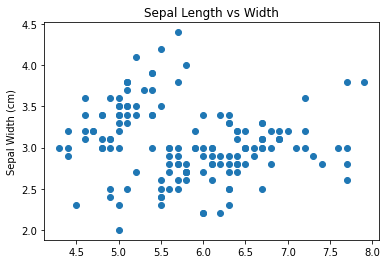

In [50]:
ax = plt.axes()
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
ax.set(label='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width')

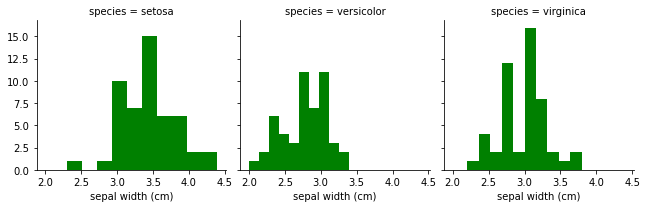

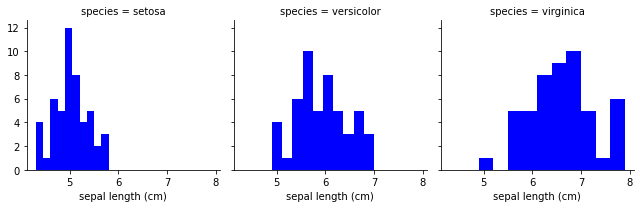

In [32]:
plot = sns.FacetGrid(df, col= 'species', margin_titles= True)
plot.map(plt.hist, 'sepal width (cm)', color ='green')

plot = sns.FacetGrid(df, col= 'species', margin_titles= True)
plot.map(plt.hist, 'sepal length (cm)', color ='blue')

In [33]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [52]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace = True)
stats_df
### END SOLUTION

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758,1.199333
25%,5.100000,2.800000,1.600,0.300000
median,5.800000,3.000000,4.350,1.300000
75%,6.400000,3.300000,5.100,1.800000
range,3.600000,2.400000,5.900,2.400000


## Tugas 6
- membuat histogram 

[Text(0.5, 0, 'Petal Length (cm)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Lengths')]

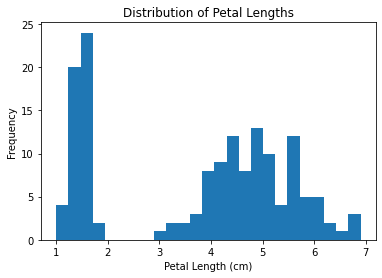

In [52]:
ax = plt.axes()
ax.hist(df['petal length (cm)'], bins= 25)
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')

Text(0.5, 0, 'Size')

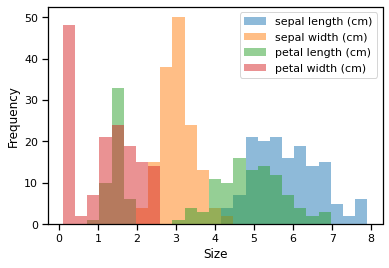

In [54]:
import seaborn as sns 
sns.set_context('notebook')
ax = df.plot.hist(bins=25, alpha = 0.5)
ax.set_xlabel("Size")

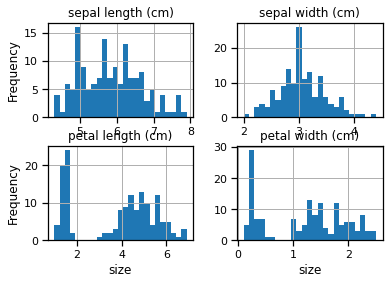

In [63]:
# membuat 4 plot 
axlist = df.hist(bins =25)
for ax in axlist.flatten():
     if ax.is_last_row():
         ax.set_xlabel("size")
     if ax.is_first_col():
        ax.set_ylabel('Frequency')

## Tugas 8 

- membuat boxplolt

array([[<AxesSubplot:title={'center':'petal length (cm)'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal width (cm)'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal length (cm)'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal width (cm)'}, xlabel='[species]'>]],
      dtype=object)

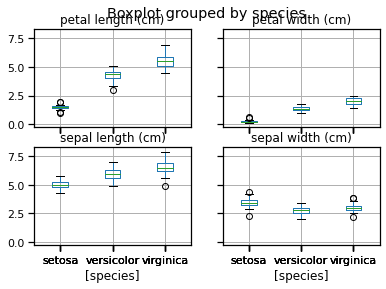

In [64]:
df.boxplot(by='species')

In [71]:
plt_data = (df
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns ={0: 'size', 'level_1': 'measurement'})
)
plt_data .head()

,species,measurement,size
0,setosa,sepal length (cm),5.1
1,setosa,sepal width (cm),3.5
2,setosa,petal length (cm),1.4
3,setosa,petal width (cm),0.2
4,setosa,sepal length (cm),4.9


<AxesSubplot:xlabel='measurement', ylabel='size'>

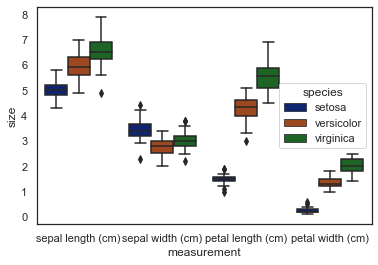

In [75]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
f = plt.figure(figsize=(6,4))
sns.boxplot(x ='measurement', y = 'size',  hue= 'species', data = plt_data)

# Tugas 10 

- Membuat pairplot

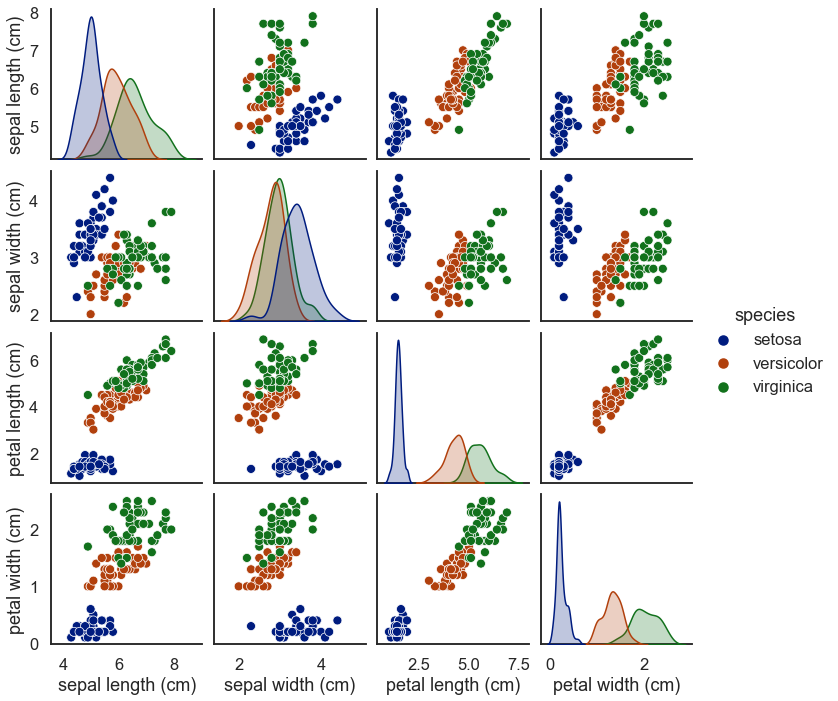

In [80]:
sns.set_context('talk')
sns.pairplot(df, hue='species')

C:\Users\tijeee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tijeee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tijeee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

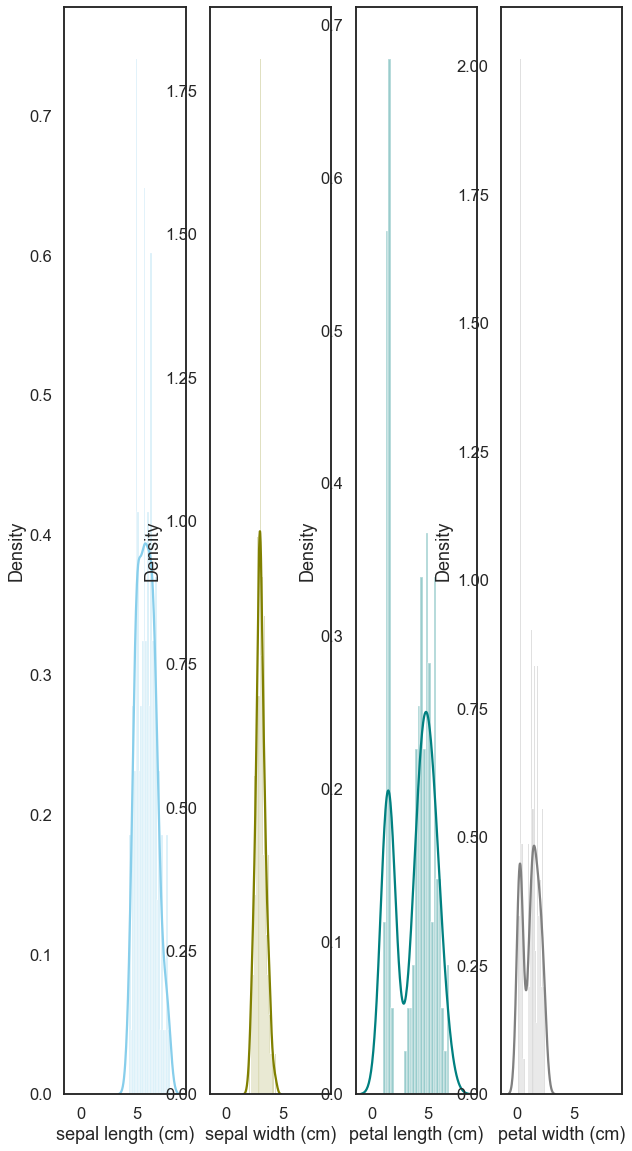

In [98]:
colors =["skyblue", "olive", "teal", "grey"]
f, axes = plt.subplots(1, 4, figsize=(10, 20), sharex=True)
for i, ax in enumerate(axes.flatten()):
    sns.distplot( df.iloc[:, i] , bins =25,  color=colors[i%4], ax=ax)
    